<a href="https://colab.research.google.com/github/santheipman/CS112.L11.KHTN/blob/master/EXCERCISE/WEEK_02/TAOBIEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.uit.edu.vn/sites/vi/files/banner.png" alt="UIT logo" class="left">
<h1 align= "center">   <strong>     CS112.PHÂN TÍCH VÀ THIẾT KẾ THUẬT TOÁN</strong> </h1>




# **CS112.L11.KHTN**
## **NHÓM 5**

|  STT | HỌ TÊN             | MSSV     | VAI TRÒ     | LIÊN HỆ |
|---|--------------------|-----------------|----------------|---------|
|**1** | **VŨ QUÍ SAN**         | **18520143** | **NHÓM TRƯỞNG** |[**GitHub**](https://github.com/santheipman) **và** **Gmail**: 18520143@gm.uit.edu.vn          |
| **2** | **PHẠM MẠNH TIẾN**     | **18520166**| **THÀNH VIÊN**  | [**GitHub**]("https://github.com/tienpm") **và** **Gmail**: 18520166@gm.uit.edu.vn        |
| **3** |**NGUYỄN VƯƠNG THỊNH** | **18520367** | **THÀNH VIÊN**  |  [**GitHub**]("https://github.com/ThinhNguyen209") **và** **Gmail**: 18520367@gm.uit.edu.vn      |


## **Đề bài**

### **Tảo Biển (1s, 50M)**
Tảo biển sinh sản rất nhanh khi có môi trường thuận lợi với chúng và có những loài còn tiết ra môi trường những chất độc hại.

Một loại tảo nâu trong môi trường nước bị ô nhiễm nặng sinh sản theo quy luật sau:

* Ngày đầu tiên (ngày 0) có **n** cá thể ở mức 1,
* Ở mỗi ngày tiếp theo, mỗi cá thể mức **i** sinh ra **i** cá thể mức 1, các cá thể mới sinh sẽ sinh sôi, phát triển từ ngày hôm sau.
* Bản thân các cá thể mức **i** phát triển thành mức **i**+1 và chu kỳ phát triển trong ngày chấm dứt.
Hãy xác định sau **k** ngày trong nước biển có bao nhiêu cá thể.

***Dữ liệu:*** Vào từ thiết bị nhập chuẩn gồm một dòng chứa 2 số nguyên **n** và **k** ($1 ≤ n ≤ 1000,  1 ≤ k ≤ 10^{18}$).

(test hiện tại chỉ có $k \le 10^5$,  thầy sẽ chấm lại sau khi nâng cấp test)

***Kết quả:*** Đưa ra thiết bị xuất chuẩn một số nguyên – số lượng cá thể  tảo theo mô đun $10^9+7$.

***Ví dụ:***

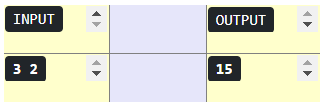

## **1. Tóm tắt bài toán**

Cho dãy $n$ phần tử giá trị bằng 1, tính tổng số phần tử của dãy sau $k$ vòng lặp, biết rằng: tại mỗi vòng lặp thì mỗi phần tử $a_i$ sẽ sinh ra $a_i$ phần tử giá trị bằng 1, đồng thời giá trị của $a_i$ được tăng lên 1 đơn vị.

Ví dụ minh họa cho trường hợp $n = 1, k = 3$:

![figure_tao_bien.png]( 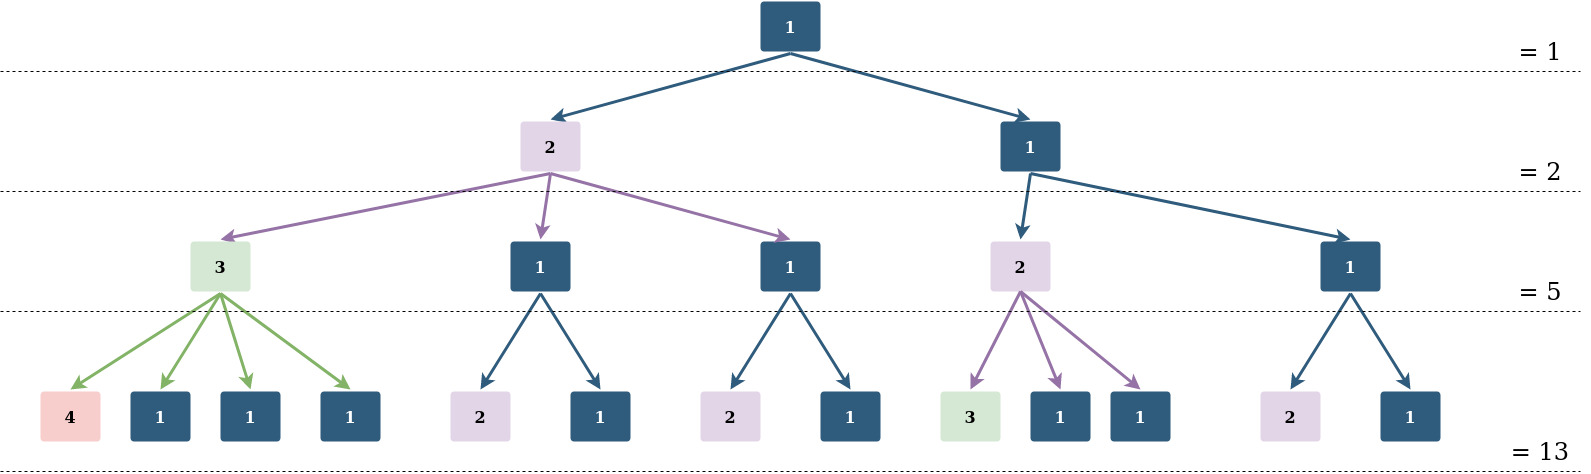)

## **2. Nhận dạng mẫu (Pattern-Recognition)**

Bởi vì ngày thứ $0$ có $n$ phần tử giá trị 1 có vai trò như nhau nên ta chỉ cần tính số lượng phần tử được sinh ra bởi một trong $n$ phần tử ban đầu đó rồi nhân với $n$.

Với $n = 1$ ta tính toán tổng số phần tử qua các vòng lặp như hình trên sẽ thu được dãy: $1, 2, 5, 13, 34, 89, ...$. Nếu để ý ta sẽ thấy dãy này có thể được rút ra từ dãy Fibonacci: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...$

Như vậy bài toán trở thành việc tính:
$$\mathbf{S(n, k) = n \times F(2k + 1)}$$
với $F(2k + 1)$ là giá trị phần tử thứ $2k + 1$ trong dãy Fibonacci.

## **3. Thuật toán**

**Ý tưởng**

Từ công thức tại mục 2 ta thấy rằng độ phức tạp của bài toán phụ thuộc vào $k$. Với $1 ≤ k ≤ 10^{18}$ thì giải thuật tính số Fibonacci với độ phức tạp $O(n)$ sẽ không hoàn thành trong giới hạn thời gian $1$s.

Ta có thể dùng thuật toán [tính số Fibonacci bằng ma trận]('http://www.math.hawaii.edu/~pavel/fibonacci.pdf') với độ phức tạp $\mathbf{O(log(k))}$:

- $F_{k+1}$ và $F_k$ được tính như sau:
$\begin{pmatrix} F_{k+1} \\ F_k \end{pmatrix} = A^{k} \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, với $A = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}$
- Để tính $A^{k}$, ta viết hàm đệ quy `power(A, k)` có công thức:
$$power(A, k) = \begin{cases} A & \mbox{nếu } k = 1 \\ power(A, t) \times power(A, t) & \mbox{nếu } k = 2t \\ power(A, t) \times power(A, t) \times A & \mbox{nếu } k = 2t + 1\end{cases}$$

**Mã giả thuật toán**

```pseudocode
function power(A, k):
   
   if k is 1:
      return A
      
   half_power := Call power(A, k div 2)
   if k is even:
      power = half_power * half_power
   if k is odd:
      power = half_power * half_power * A

   return power
```

## **4. Cài đặt**

In [ ]:
MOD = int(1e9+7)

def matrix_multiply(A, B, mod): 
    """
    Nhân hai ma trận A và B
    """
    A_00 = ((A[0][0] * B[0][0]) % mod + (A[0][1] * B[1][0]) % mod) % mod 
    A_01 = ((A[0][0] * B[0][1]) % mod + (A[0][1] * B[1][1]) % mod) % mod 
    A_10 = ((A[1][0] * B[0][0]) % mod + (A[1][1] * B[1][0]) % mod) % mod
    A_11 = ((A[1][0] * B[0][1]) % mod + (A[1][1] * B[1][1]) % mod) % mod
      
    A[0][0] = A_00 
    A[0][1] = A_01 
    A[1][0] = A_10 
    A[1][1] = A_11 

def power(A, k):
    """
    Tính lũy thừa k của ma trận A
    """
    if( k == 0 or k == 1): 
        return; 
    base = [[1, 1], [1, 0]]; 
          
    power(A, k // 2) 
    matrix_multiply(A, A, MOD) 
          
    if (k % 2 != 0): 
        matrix_multiply(A, base, MOD) 

def fibonacci(k):  
    """
    Hàm tính số Fibonacci thứ k
    """
    F = [[1, 1], [1, 0]]
    power(F, k - 1) 
    return F[0][0]


n, k = [int(x) for x in input().split()]  # nhập input
fib_2k_plus_1 = fibonacci(2*k + 1)  # tính số Fibonacci thứ 2k + 1
print((n*fib_2k_plus_1) % MOD)  # in ra kết quả bài toán

3 2
15


## **5. Kết quả trên Wecode**

![wecode.png]( 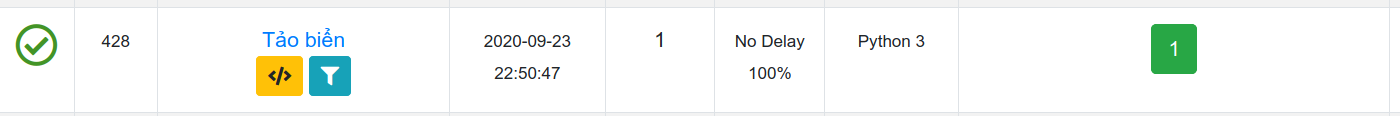)